## INDIA


In [1]:
import pandas as pd
import warnings
import folium
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

years = mdates.YearLocator()
days = mdates.DateLocator()

In [2]:
df = pd.read_csv(r'C:\Users\DeLL\Desktop\Global terrorism\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1',low_memory=False)

In [3]:
india_terrorism = df[df.country_txt=='India'].reset_index(drop=True)
india_terrorism['count']=1

time = []
for i in range(len(india_terrorism)):
    if india_terrorism['iday'][i] == 0:
        day = 10
    else:
        day = india_terrorism['iday'][i]
    time.append(datetime.strptime("%s-%s-%s"%(day,india_terrorism['imonth'][i],india_terrorism['iyear'][i]),'%d-%m-%Y'))
india_terrorism['time_event'] = time

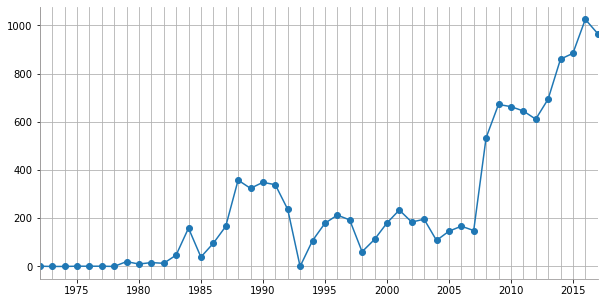

In [4]:
df = india_terrorism.groupby(pd.Grouper(key="time_event",freq="Y")).sum()[["count"]]
label = df.reset_index()["time_event"].apply(lambda x:datetime.strftime(x,'%Y'))
fig,ax=plt.subplots(figsize=(10,5))
df.plot(kind='line',ax=ax,marker='o',legend=False)
ax.grid(which='both')
ax.tick_params(axis='x',which="minor",bottom=False)
for i in ax.spines:
    if i!="bottom" and i!='left':
        ax.spines[i].set_visible(False)
    else:
        ax.spines[i].set_color('#9a9898')
ax.set_xlabel('')
plt.show()

In [5]:
print(df.sort_values('count',ascending=False)[:10])

            count
time_event       
2016-12-31   1025
2017-12-31    966
2015-12-31    884
2014-12-31    860
2013-12-31    694
2009-12-31    672
2010-12-31    663
2011-12-31    645
2012-12-31    611
2008-12-31    534


The most terrorist attacks in India occurred in 2016. There were 1025 events that occurred in that year.

In [12]:
## Plot Function
def barchart(kind):
    city_terrorism = india_terrorism.groupby('city').sum()[[kind]].reset_index()
    city_terrorism = city_terrorism[city_terrorism["city"]!='Unknown'].set_index('city')

    cm = matplotlib.cm.get_cmap('winter')
    colors=[cm(1.*i/20) for i in range(20)]
    rvb = mcolors.LinearSegmentedColormap.from_list("", colors)
    N = 10
    x = np.arange(N).astype(float)
    fig,ax=plt.subplots(figsize=(5,5))
    plt.barh(np.array(city_terrorism.sort_values(kind)[-10:].index),
             np.array(city_terrorism.sort_values(kind)[-10:][kind]),
             color=rvb(x/N))
    ax.set_ylabel('')
    for i in ax.spines:
        ax.spines[i].set_visible(False)
    ax.set_xticks([])
    for patch in ax.patches:
        bl = patch.get_xy()
        x = patch.get_width()+0.04*max(city_terrorism[kind])
        y = 0.3 * patch.get_height() + bl[1] 
        ax.text(x,y,"%d" %(patch.get_width()),
                ha='center', weight = 'bold')
    if kind=='count':
        ax.set_title('Top 10 City with High Terrorism',fontdict={'fontweight':'bold'})
    else:
        ax.set_title('Top 10 City with High Victim',fontdict={'fontweight':'bold'})
    plt.show()
    return city_terrorism.sort_values(kind,ascending=False)[:10]

def line_city(new_df,kind):
    df = pd.DataFrame({})
    for i in new_df.index:
        df = df.append(india_terrorism[india_terrorism['city']==i])
    df = pd.pivot_table(df,columns='city',index='time_event',values=kind,aggfunc=np.sum,fill_value=0).reset_index()
    df = df.groupby(pd.Grouper(key="time_event",freq="Y")).sum()
    label = df.reset_index()["time_event"].apply(lambda x:datetime.strftime(x,'%Y'))
    fig,ax=plt.subplots(figsize=(10,5))
    df.plot(kind='line',ax=ax,marker='o')
    ax.grid(which='both')
    ax.tick_params(axis='x',which="minor",bottom=False)
    for i in ax.spines:
        if i!="bottom" and i!='left':
            ax.spines[i].set_visible(False)
        else:
            ax.spines[i].set_color('#9a9898')
    ax.set_xlabel('')
    ax.legend(ncol=5,bbox_to_anchor=(1, -0.1))
    plt.show()


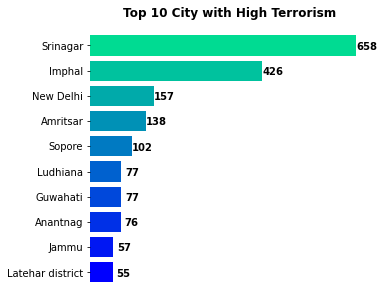

In [13]:
new_df = barchart('count')

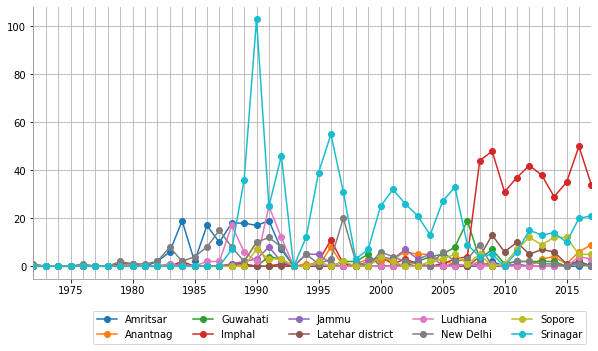

In [14]:
line_city(new_df,'count')

Most of the incidents in these cities occurred between 1990-2000. This can be seen from the increasing number of events in those years.

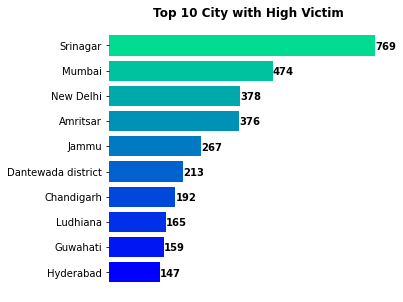

In [15]:
other_df = barchart('nkill')

Srinagar became the city with the most victims due to various terrorist incidents

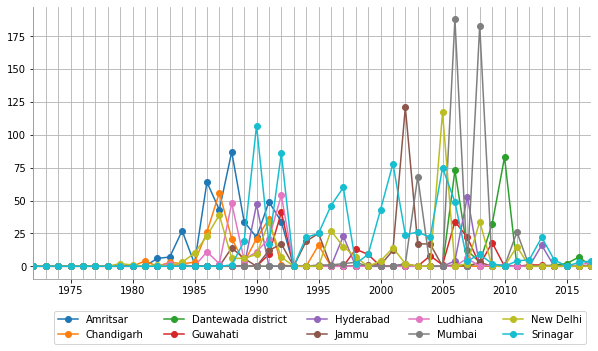

In [16]:
line_city(other_df,'nkill')

The incident in Mumbai with the most victims occurred in 2006.

In [18]:
def heatmaps(kind):
    fig,ax=plt.subplots(figsize=(20,15),nrows=2,ncols=2)
    for i in range(2):
        for j in range(2):
            if i==0 and j==0:
                cities = 'Srinagar'
            elif i==0 and j==1:
                cities = "New Delhi"
            elif i==1 and j==0:
                cities = "Mumbai"
            else:
                cities = "Imphal"
            Srinagar = india_terrorism[india_terrorism['city']==cities]
            Srinagar = pd.pivot_table(data=Srinagar, values=kind,index='targtype1_txt',
                                    columns='attacktype1_txt',aggfunc=np.sum,fill_value=0)
            Srinagar.columns = [i.replace('/','/\n').replace(' ','\n') for i in Srinagar.columns]
            sns.heatmap(Srinagar, annot=True,ax=ax[i,j],cmap="Blues",linewidths=1)
            ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation = 30,color='b',fontdict={'fontsize':9})
            ax[i,j].set_yticklabels(ax[i,j].get_yticklabels(), rotation = 0,color='b')
            if j!= 1:
                ax[i,j].set_ylabel("Target Attack Type 1",fontdict={'fontweight':'bold'})
            else:
                ax[i,j].set_ylabel("")

            if i==1:
                ax[i,j].set_xlabel("Attack Type 1",fontdict={'fontweight':'bold'})
            else:
                ax[i,j].set_xlabel("")
            ax[i,j].set_title('Attack Type with Its Target in %s'%cities,fontdict = {'fontweight':'bold'})
    fig.suptitle('Top 4 City with High Terrorism',y=0.93,fontsize=22,weight='bold')
    plt.show()


In [24]:
crime_map = folium.Map(location=[20.5937,78.9629], 
#                        tiles = "India Terrorism",
                      zoom_start = 4)

# Add data for heatmp 
data_heatmap = india_terrorism[['latitude','longitude']]
data_heatmap = india_terrorism.dropna(axis=0, subset=['latitude','longitude'])
data_heatmap = [[row['latitude'],row['longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

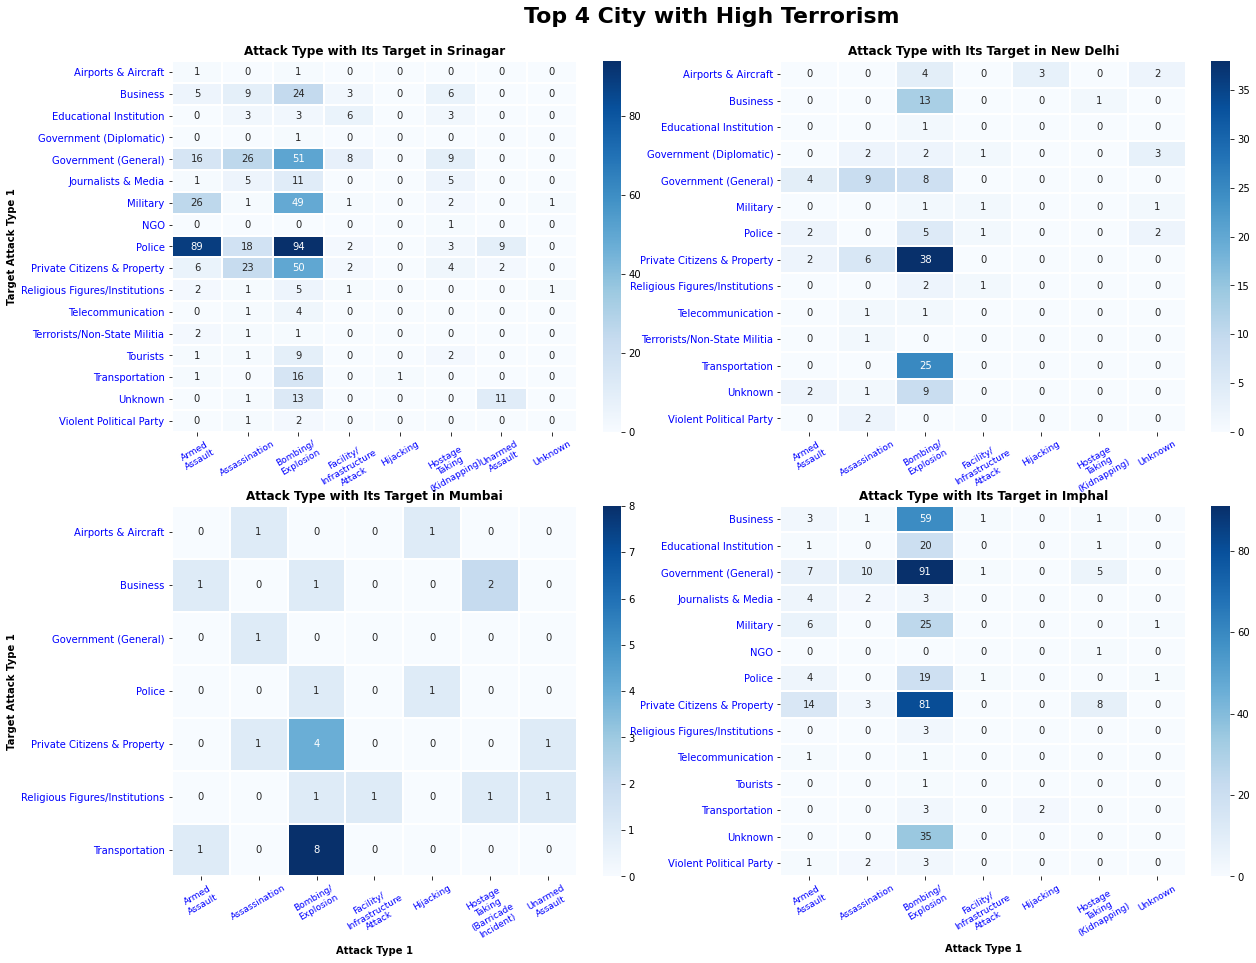

In [25]:
heatmaps('count')

The heatmap displays the number of events in each type of attack and the target of attacks that occurred in 4 cities with the highest number of events.